# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

/home/pr0f33/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/pr0f33/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


#### Merging 12 months of data into a single file

In [2]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data") if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("./SalesAnalysis/Output/all_data.csv", index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("./SalesAnalysis/Output/all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Augment the dataframe with some columns e.g. month

#### Task 2: Add month column

#### Clean up the data

##### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]

nan_df

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
# all_data.head()

all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert columns to the correct types

#### Task 3: Need to add a sales column

In [6]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [7]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Need to add a city column

In [13]:
"""
    Alternative using regular expression grouping
    df_address = all_data[re.match(r"(.+), (.+), (.+)", all_data["Purchase Address"].to_string())]
"""

# Use the .apply() method
address_column = all_data["Purchase Address"]

def get_city(address):
    return address.split(",")[1]"

def get_state_code_with_postal_code(address):
    return address.split(",")[2]

def get_state_code(address):
    return address.split(",")[2][0:3]

def get_city_with_state_code(address):
    return f"{get_city(address)} ({get_state_code(address)})"

all_data["City"] = address_column.apply(lambda x: get_city(x))

all_data["City_n_State_Code"] = address_column.apply(lambda x: get_city_with_state_code(x))

all_data["State_Code"] = address_column.apply(lambda x: get_state_code(x))

all_data["State_n_Postal_Code"] = address_column.apply(lambda x: get_state_code_with_postal_code(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State_Code,State_Code,State_n_Postal_Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas ( TX),TX,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston ( MA),MA,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles ( CA),CA,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001


#### Question 1: What was the best month for sales? How much was earned in that month?

In [9]:
sales_by_month = all_data.groupby("Month").sum()["Sales"]

sales_by_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

##### Answer: The best month is December with sales of 4_613_443.34

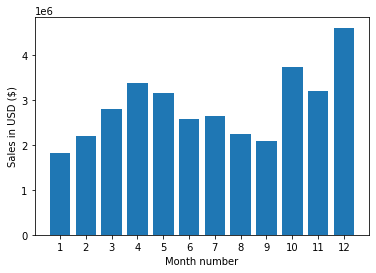

In [10]:
months = range(1, 13)

plt.bar(months, sales_by_month)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.xticks(months)
plt.show()

#### Question 2: What US city had the highest number of sales?

In [11]:
sales_by_city = all_data.groupby("City_n_State_Code").sum()["Sales"]

sales_by_city

City_n_State_Code
 Atlanta ( GA)          2795498.58
 Austin ( TX)           1819581.75
 Boston ( MA)           3661642.01
 Dallas ( TX)           2767975.40
 Los Angeles ( CA)      5452570.80
 New York City ( NY)    4664317.43
 Portland ( ME)          449758.27
 Portland ( OR)         1870732.34
 San Francisco ( CA)    8262203.91
 Seattle ( WA)          2747755.48
Name: Sales, dtype: float64

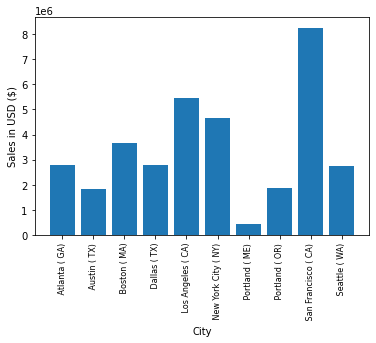

In [12]:
cities = [city for city, df in all_data.groupby("City_n_State_Code")]

plt.bar(cities, sales_by_city)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.xticks(cities, rotation="vertical", size=8)
plt.show()